In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\Dimitri Salavaci\Project_2\Statistical_Modelling_Project\project_2.csv')
df


,Unnamed: 0,empty_slots,free_bikes,latitude,longitude,distance,venue,location.formatted_address,City,review_count,rating
0,0,4.0,5.0,55.858167,-4.245483,0.0,0,0,0,0.0,0.0
1,1,4.0,7.0,55.878278,-4.288487,0.0,0,0,0,0.0,0.0
2,2,3.0,1.0,55.864788,-4.271852,0.0,0,0,0,0.0,0.0
3,3,0.0,1.0,55.862983,-4.241000,0.0,0,0,0,0.0,0.0
4,4,4.0,4.0,55.852500,-4.258850,0.0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
171,45,0.0,0.0,55.874267,-4.276554,0.0,The Lansdowne Bar & Kitchen,0,Glasgow,26.0,3.5
172,46,0.0,0.0,55.859095,-4.248108,0.0,Rab Ha's,0,Glasgow,26.0,4.0
173,47,0.0,0.0,55.854724,-4.234856,0.0,Saint Luke's And The Winged Ox,0,Glasgow,15.0,4.0
174,48,0.0,0.0,55.871839,-4.297911,0.0,Bar Gumbo,0,Glasgow,34.0,4.0


In [4]:
df1 = df.drop(df.columns[[0,1,2,3,4,5,6,7,8]], axis=1)
df1

,review_count,rating
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
171,26.0,3.5
172,26.0,4.0
173,15.0,4.0
174,34.0,4.0


Build a regression model.

Text(0, 0.5, 'Review Count')

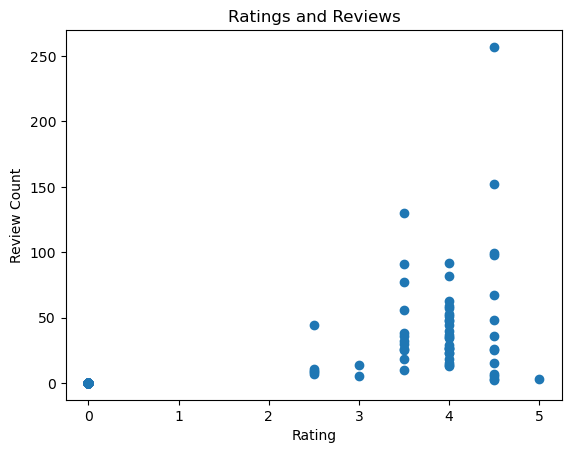

In [5]:
x = df1['rating']
y = df1['review_count']

plt.plot(x,y, 'o')
plt.title('Ratings and Reviews')
plt.xlabel('Rating')
plt.ylabel('Review Count')


array([[<AxesSubplot:title={'center':'review_count'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

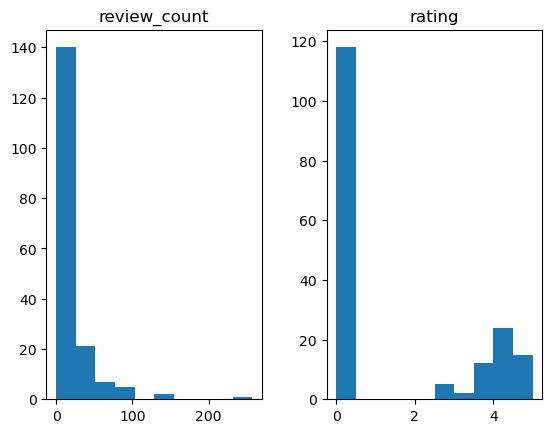

In [27]:
df1.hist(grid = False)

In [7]:
Y = df1.drop('review_count', axis=1)
X = df1[['review_count']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [8]:
reg_mod = LinearRegression()
reg_mod.fit(X_train, y_train)

LinearRegression()

In [9]:
intercept = reg_mod.intercept_[0]
coeff = reg_mod.coef_[0][0]

intercept

0.5447418715669828

In [10]:
coeff

0.05434019701740364

In [11]:
predict = reg_mod.predict([[45]])
predict_value = predict[0][0]


c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
y_predict = reg_mod.predict(X_test)

In [13]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

In [14]:
est.pvalues

const           1.801475e-09
review_count    6.104469e-23
dtype: float64

In [15]:
model_mse = mean_squared_error(y_test, y_predict)
model_mse

5.152682880203468

In [16]:
model_mae = mean_absolute_error(y_test, y_predict)
model_mae

1.3706950845554315

In [17]:
model_rmse = math.sqrt(model_mse)
model_rmse

2.269952175752491

In [18]:
r2 = r2_score(y_test, y_predict)
r2

-0.3279397489920348

In [19]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     130.8
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           6.10e-23
Time:                        21:44:39   Log-Likelihood:                -308.69
No. Observations:                 176   AIC:                             621.4
Df Residuals:                     174   BIC:                             627.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7366      0.116      6.351      0.000       0.508       0.966
review_count     0.0384      0.003     11.435      0.000       0.032       0.045
==============================================================================
Omnibus:                       23.034   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.688
Skew:                           0.670   Prob(JB):                     2.41e-09
Kurtosis:                       4.901   Cond. No.                         37.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

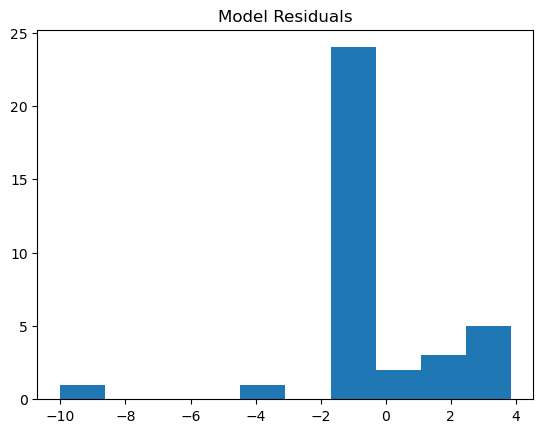

In [20]:
(y_test - y_predict).hist(grid = False)
plt.title('Model Residuals')
plt.show

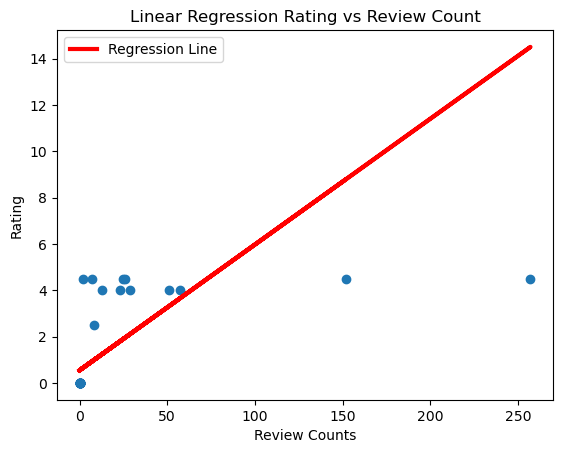

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color = 'red', linewidth = 3, linestyle = '-', label = 'Regression Line')
plt.title('Linear Regression Rating vs Review Count')
plt.xlabel('Review Counts')
plt.ylabel('Rating')
plt.legend()
plt.show()


Provide model output and an interpretation of the results. 

- Data seems to have a right-skew
- The adjusted r2 value tells us that there is some correlation, so the model itself is a decent fit
- Based on the results we can conclude that the higher number of reviews your venue receives the more accurate the rating will be
- There is an outlier (0) due to the fact that not every venue has data available for reviews and it is impacting the findings 

# Stretch

How can you turn the regression model into a classification model?

- Instead of using numerical values, you can use different labels, in this case rating would be either high or low.